## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
# import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, out_units=10, num_neuron=[512, 512, 512], drop_ratio=0.0):
  """Code Here
  建立你的神經網路
  """
  input_layer = keras.layers.Input(input_shape)
  for i, num in enumerate(num_neuron):
    if i == 0:
      x = keras.layers.Dense(
          units=num,
          activation='relu',
          name="hidden_layer"+str(i+1))(input_layer)
      x = keras.layers.Dropout(drop_ratio)(x)
    else:
      x = keras.layers.Dense(
          units=num,
          activation='relu',
          name="hidden_layer"+str(i+1))(x)
      x = keras.layers.Dropout(drop_ratio)(x)
  out = keras.layers.Dense(
      units=10,
      activation='softmax',
      name="output_layer")(x)
      
  model = keras.models.Model(inputs=input_layer, outputs=out)
  return model


In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0, 0.01, 0.05, 0.1]
LAYERS_EXP = {3:[1024, 512, 256], 
        6:[1024, 1024, 512, 512, 256, 256]
        }

In [7]:
results = {}

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for i in LAYERS_EXP.keys():
  for j in Dropout_EXP:
    keras.backend.clear_session()
    print(f'EXPERIMENT: [ Layer_Num - {i} Dropout_Ratio - {j} ]')
    model = build_mlp(x_train.shape[1:],num_neuron=LAYERS_EXP[i], drop_ratio=j)

    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.summary()
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    name_tag = f'Layer_Num:{i} Dropout_Ratio:{j}'
    results[name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}






EXPERIMENT: [ Layer_Num - 3 Dropout_Ratio - 0 ]
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dr

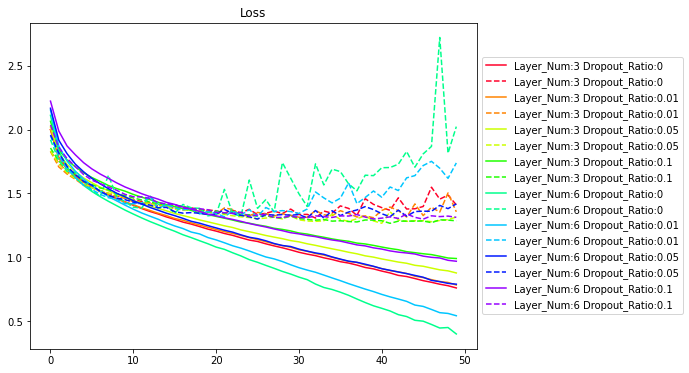

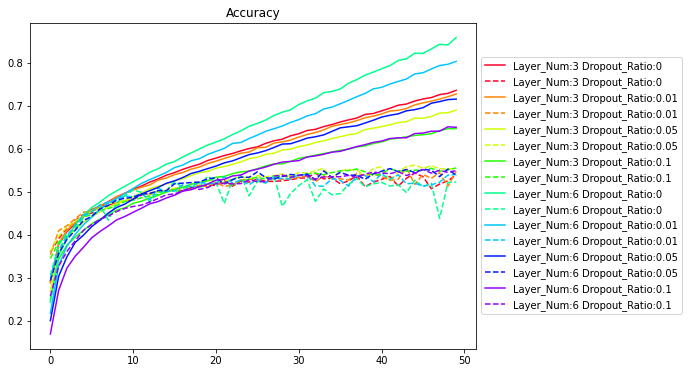

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]


plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Accuracy")
plt.show()

## 優化器換Adam (配合較適當的dropout ratio)

In [9]:
def build_mlp(input_shape, out_units=10, num_neuron=[512, 512, 512], drop_ratio=0.0):
  """Code Here
  建立你的神經網路
  """
  input_layer = keras.layers.Input(input_shape)
  for i, num in enumerate(num_neuron):
    if i == 0:
      x = keras.layers.Dense(
          units=num,
          activation='relu',
          name="hidden_layer"+str(i+1))(input_layer)
      x = keras.layers.Dropout(drop_ratio)(x)
    else:
      x = keras.layers.Dense(
          units=num,
          activation='relu',
          name="hidden_layer"+str(i+1))(x)
      x = keras.layers.Dropout(drop_ratio)(x)
  out = keras.layers.Dense(
      units=10,
      activation='softmax',
      name="output_layer")(x)
      
  model = keras.models.Model(inputs=input_layer, outputs=out)
  return model

In [10]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.05, 0.1, 0.2]
LAYERS_EXP = {3:[1024, 512, 256], 
        6:[1024, 1024, 512, 512, 256, 256]
        }

In [11]:
results.clear()

for i in LAYERS_EXP.keys():
  for j in Dropout_EXP:
    keras.backend.clear_session()
    print(f'EXP: Layers - {i} Dropout_Ratio - {j}')
    model = build_mlp(x_train.shape[1:],num_neuron=LAYERS_EXP[i], drop_ratio=j)

    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    name_tag = f'Layer_Num:{i} Dropout_Ratio:{j}'
    results[name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

EXP: Layers - 3 Dropout_Ratio - 0.05
Epoch 1/50
196/196 [==============================] - 1s 6ms/step - loss: 2.2513 - accuracy: 0.2103 - val_loss: 1.7929 - val_accuracy: 0.3471
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.7694 - accuracy: 0.3606 - val_loss: 1.6368 - val_accuracy: 0.4143
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6491 - accuracy: 0.4087 - val_loss: 1.6607 - val_accuracy: 0.4112
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5916 - accuracy: 0.4290 - val_loss: 1.5529 - val_accuracy: 0.4482
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5464 - accuracy: 0.4429 - val_loss: 1.4836 - val_accuracy: 0.4700
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.4945 - accuracy: 0.4656 - val_loss: 1.4699 - val_accuracy: 0.4827
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.4604 - accuracy: 0.4765 - val_loss:

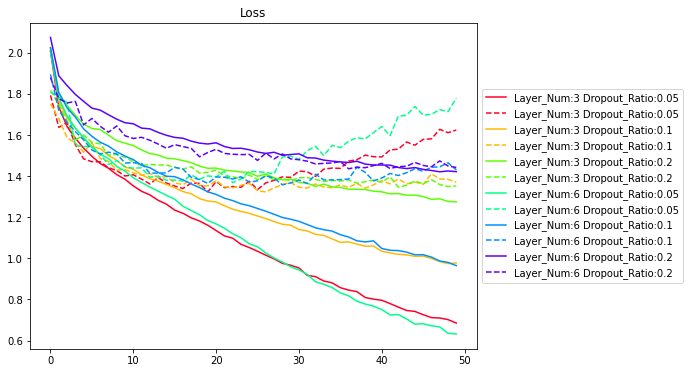

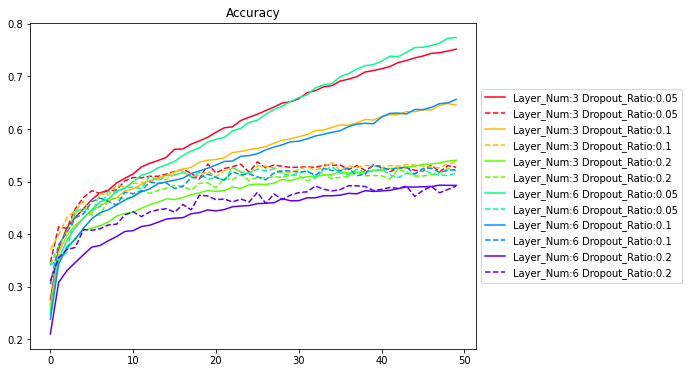

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]


plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Accuracy")
plt.show()